In [7]:
import pandas as pd
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = "retina"

In [160]:
%run eval_lofi_hparams.py

  0%|          | 0/16 [00:00<?, ?it/s]

In [161]:
target_digits

[0, 1, 2, 3, 4, 5]

In [163]:
ksize = 200
keyv = "osa-error"

kernel = np.ones(ksize) / ksize

metrics = []
columns = []

for output in outputs_all:
    cfg = output["config"]
    
    dcov = cfg.lofi.dynamics_covariance
    dwgt = cfg.lofi.dynamics_weight
    eps = round(1 - dwgt, 7)
    
    err_lofi = output["outputs"][keyv]
    
    err_smooth_lofi = np.convolve(err_lofi, kernel, mode="valid")
    
    metrics.append(err_smooth_lofi)
    columns.append((dcov, eps))
columns = pd.MultiIndex.from_tuples(columns, names=["dcov", "eps"])
metrics_df = pd.DataFrame(metrics, index=columns).T

### Smoothed one-step-ahead accuracy

Here `eps` is such that `1 - eps = dynamics_weights`

Text(0.5, 14.722222222222216, 'num. obs')

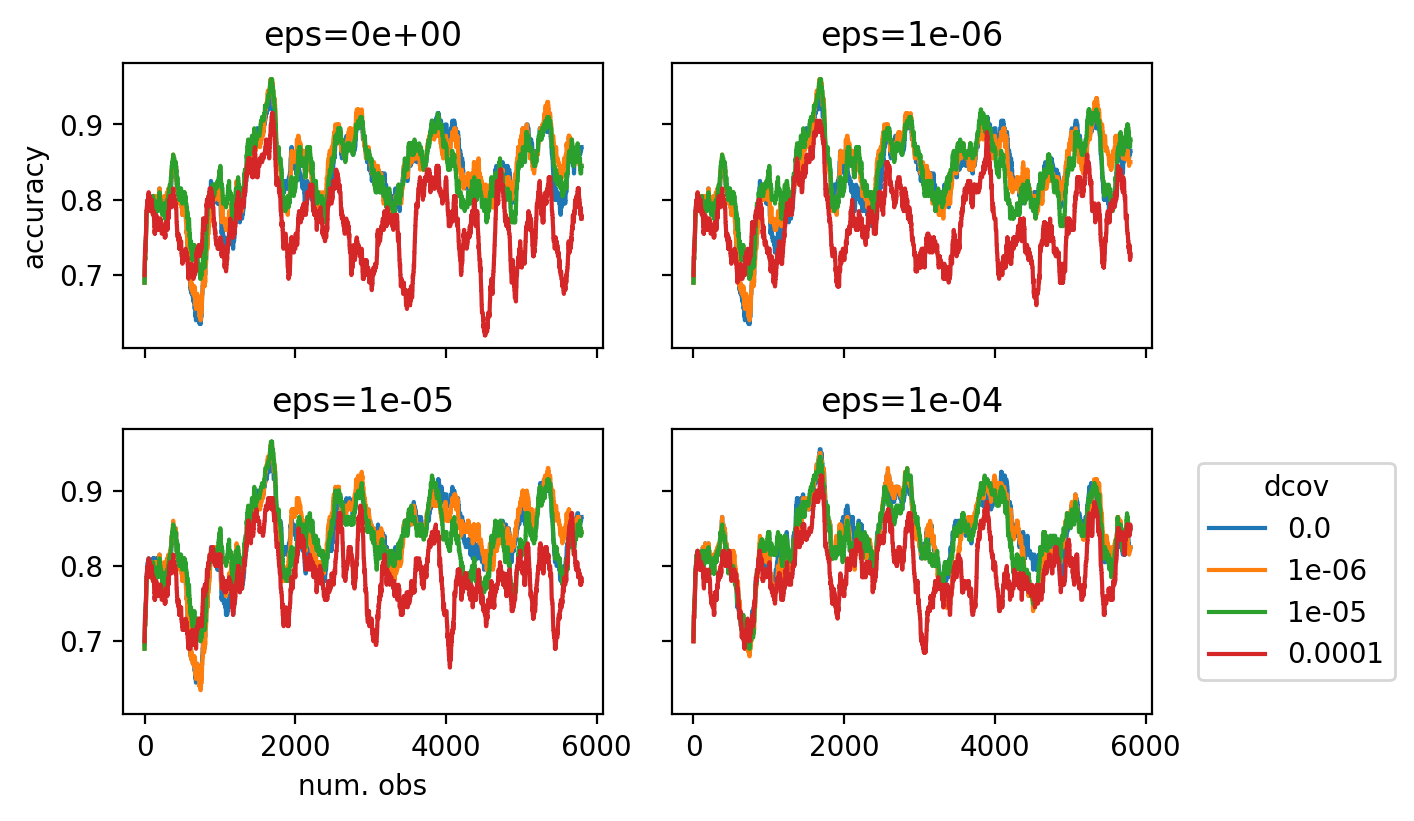

In [173]:
fig, axs = plt.subplots(2, 2, figsize=(7, 4), sharex=True, sharey=True)
axs = axs.ravel()
for ax, eps in zip(axs, list_dynamics_covariance):
    metrics_df.xs(eps, axis=1, level="eps").plot(ax=ax, legend=False)
    ax.set_title(f"{eps=:0.0e}")
ax.legend(title="dcov", loc="center", bbox_to_anchor=(1.3, 0.5))
plt.tight_layout()

axs[0].set_ylabel("accuracy")
axs[2].set_xlabel("num. obs")

## Weights

In [54]:
params_magnitude = outputs_rsgd["params_magnitude"]["params"]
colors = plt.cm.tab10(np.arange(0, len(params_magnitude)))
# Create the figure and GridSpec
fig = plt.figure(figsize=(9, 4))
gs = plt.GridSpec(nrows=4, ncols=2, figure=fig, width_ratios=[0.6, 0.4])

# Create the subplots
# Create the subplots
ax_main = fig.add_subplot(gs[:, 0])
for key, color in zip(params_magnitude, colors):
    v = params_magnitude[key]
    vnorm = (v - v.mean()) / v.std()
    ax_main.plot(vnorm, c=color, label=key)
ax_main.legend()

for i, key in enumerate(params_magnitude):
    ax = fig.add_subplot(gs[i, 1])
    if i == 0:
        ax.set_title("Raw")
    v = params_magnitude[key]
    ax.plot(v, color=colors[i])
plt.suptitle("Dense-layer Frobenius norm")
ax_main.grid(alpha=0.3)
ax_main.set_title("Normalised")
plt.tight_layout()

NameError: name 'outputs_rsgd' is not defined